In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [66]:
num_points = 500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=num_points, random_state=123, centers=centers, cluster_std=0.4)

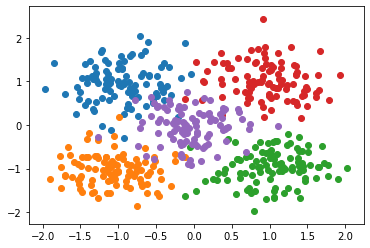

In [67]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [68]:
y_cat = to_categorical(y, 5)

In [69]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 124us/step - loss: 1.3095 - accuracy: 0.5460
Epoch 2/100
500/500 [==============================] - 0s 17us/step - loss: 0.6280 - accuracy: 0.8360
Epoch 3/100
500/500 [==============================] - 0s 17us/step - loss: 0.4202 - accuracy: 0.9000
Epoch 4/100
500/500 [==============================] - 0s 17us/step - loss: 0.3377 - accuracy: 0.9340
Epoch 5/100
500/500 [==============================] - 0s 16us/step - loss: 0.2966 - accuracy: 0.9400
Epoch 6/100
500/500 [==============================] - 0s 17us/step - loss: 0.2706 - accuracy: 0.9380
Epoch 7/100
500/500 [==============================] - 0s 16us/step - loss: 0.2528 - accuracy: 0.9440
Epoch 8/100
500/500 [==============================] - 0s 16us/step - loss: 0.2392 - accuracy: 0.9440
Epoch 9/100
500/500 [==============================] - 0s 16us/step - loss: 0.2303 - accuracy: 0.9420
Epoch 10/100
500/500 [==============================] - 0s 18us/step - loss: 0.22

In [71]:
def plot_multiclass_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

[2]


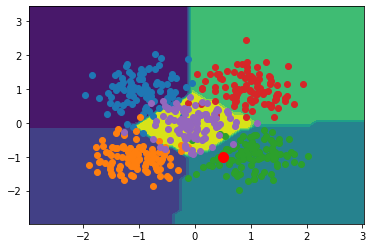

In [72]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = -1
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print(prediction)